In [1]:
import scanpy as sc
import os
import sys
import utils

data_base_path = '../data/base/10x_results/filtered_feature_bc_matrix'

model_name = 'normal'
results_qcA_file = '../data/calculated/preprocessing/{}_qcA.h5ad'.format(model_name)
results_analysis_file = '../data/calculated/preprocessing/{}_analysis.h5ad'.format(model_name)
out_dir = 'output'


os.path.exists(data_base_path)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
seed = 0


# # if you need
import warnings
warnings.filterwarnings('ignore')

AAACCCAAGTTCGCAT-1    1
AAACCCAGTCCATCTC-1    1
AAACCCAGTGACACAG-1    1
Name: batch, dtype: object
AAACCCAAGTTCGCAT-1    young
AAACCCAGTCCATCTC-1    young
AAACCCAGTGACACAG-1    young
AAACCCAGTTTCGATG-1    young
AAACCCATCAGACCTA-1    young
Name: y_o, dtype: object
AnnData object with n_obs × n_vars = 73700 × 32285
    obs: 'batch', 'y_o'
    var: 'gene_ids', 'feature_types'


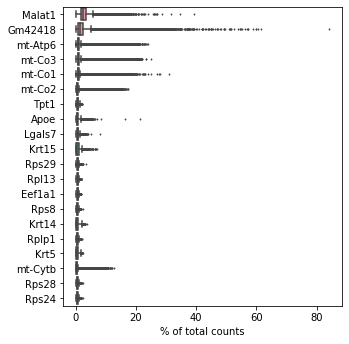

In [2]:
adata = utils.data_import(data_base_path)

In [3]:
adata = utils.basic_computing(adata, seed)

AnnData object with n_obs × n_vars = 73700 × 32285
    obs: 'batch', 'y_o'
    var: 'gene_ids', 'feature_types'


qcA : mean : 8023.44921875
qcA : sd : 7389.04638671875
qcA : mean + sd : 15412.49609375
qcA : mean - sd : 634.40283203125
****************************************************************************************************
Cluster0
Mean : 6172.39013671875
Cluster1
Mean : 8847.9892578125
Cluster2
Mean : 7849.11767578125
Cluster3
Mean : 7627.05615234375
Cluster4
Mean : 8811.0390625
Cluster5
Mean : 4435.775390625
Cluster6
Mean : 4214.63232421875
Cluster7
Mean : 1037.6170654296875
Cluster8, qcA linear top over
Mean : 16599.572265625
Cluster9
Mean : 5876.06201171875
Cluster10
Mean : 9923.0595703125
Cluster11
Mean : 2617.772216796875
Cluster12
Mean : 9241.572265625
Cluster13
Mean : 8635.5087890625
Cluster14
Mean : 13435.759765625
Cluster15
Mean : 6845.5341796875
Cluster16, qcA linear top over
Mean : 41653.2578125
Cluster17
Mean : 1164.5201416015625
Cluster18
Mean : 13899.0166015625
Cluster19
Mean : 2648.429931640625
Cluster20
Mean : 4559.447265625
Cluster21, qcA linear top over
Mean : 30619.

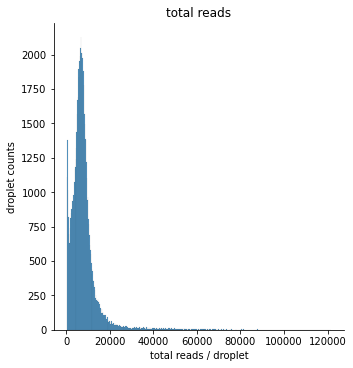

In [4]:
# qcA drop cluster : mean + 1 SD ( (1 read) /droplet)
# cluster 8, 16, 21

adata.obs['first_louvain'] = adata.obs['louvain']
adata_qcA = utils.qcA_linear(adata, out_dir,  model_name)

In [5]:
adata_qcA.write(results_qcA_file)

Trying to set attribute `.obs` of view, copying.
... storing 'batch' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'y_o' as categorical
Trying to set attribute `.var` of view, copying.
... storing 'feature_types' as categorical
... storing 'feature_types' as categorical


In [6]:
adata_analysis = sc.read(results_qcA_file)

In [7]:
batch = adata_analysis.obs.groupby('first_louvain')
batch.size()

first_louvain
0     8193
1     6427
2     6012
3     5568
4     5417
5     5410
6     5284
7     4502
9     3552
10    3008
11    2984
12    2315
13    2270
14    1837
15    1805
17    1394
18     795
19     456
20     454
dtype: int64

In [8]:
# Add QC : drop cluster : mean - 1 SD ( (>1 read) / droplet)
adata_analysis = adata_analysis[adata_analysis.obs['first_louvain'] != '7']
adata_analysis = adata_analysis[adata_analysis.obs['first_louvain'] != '17']

In [9]:
adata_analysis = utils.basic_computing(adata_analysis, seed)

View of AnnData object with n_obs × n_vars = 61787 × 32285
    obs: 'batch', 'y_o', 'louvain', 'first_louvain', 'n_counts'
    var: 'gene_ids', 'feature_types'
    uns: 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [10]:
adata_analysis = utils.add_computing(adata_analysis, seed)

In [11]:
adata_analysis.obs['first_louvain'] = adata_analysis.obs['first_louvain'].astype('int').tolist()
adata_analysis.obs['louvain'] = adata_analysis.obs['louvain'].astype('int').tolist()

adata_analysis.obs['first_louvain'] += 1
adata_analysis.obs['louvain'] += 1

adata_analysis.obs['first_louvain'] = adata_analysis.obs['first_louvain'].astype('str').tolist()
adata_analysis.obs['louvain'] = adata_analysis.obs['louvain'].astype('str').tolist()

In [12]:
cluster = adata_analysis.obs.groupby('louvain')
cluster.size()

louvain
1     6838
10    2998
11    2990
12    2196
13    2051
14    1760
15    1701
16     942
17     744
18     460
19     443
2     5729
3     5559
4     5196
5     4910
6     4753
7     4344
8     4337
9     3836
dtype: int64

... storing 'louvain' as categorical
... storing 'first_louvain' as categorical


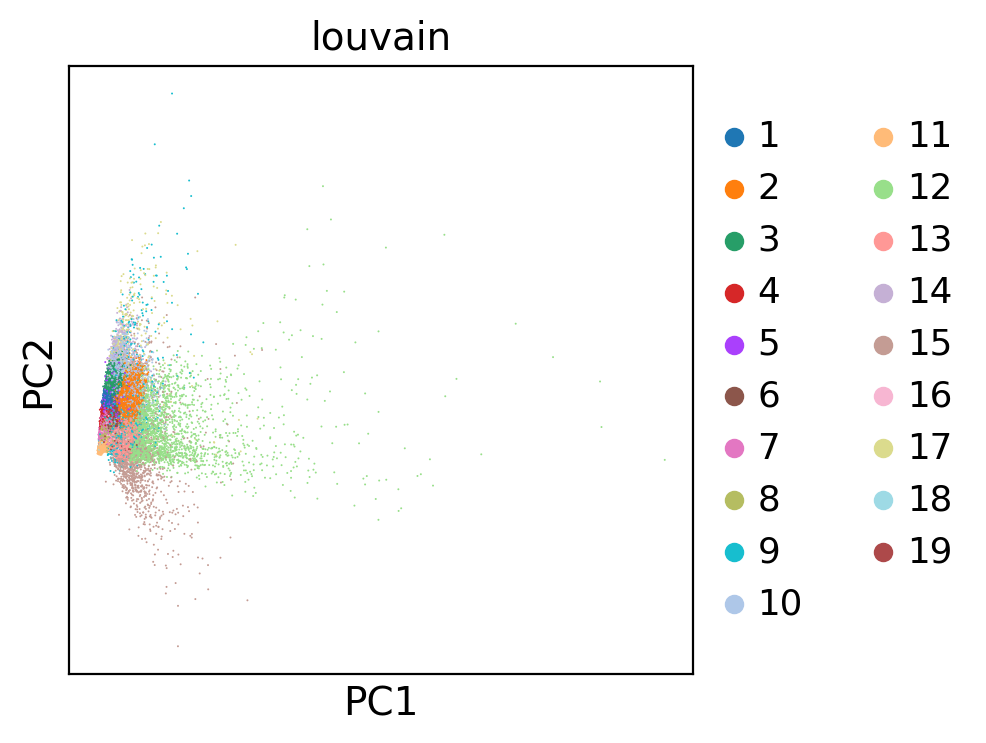

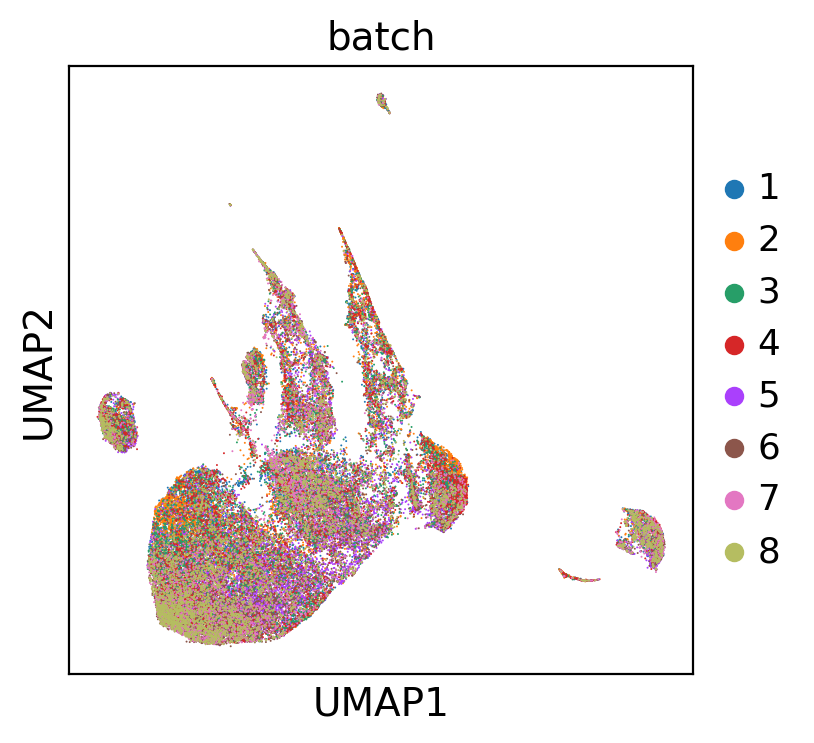

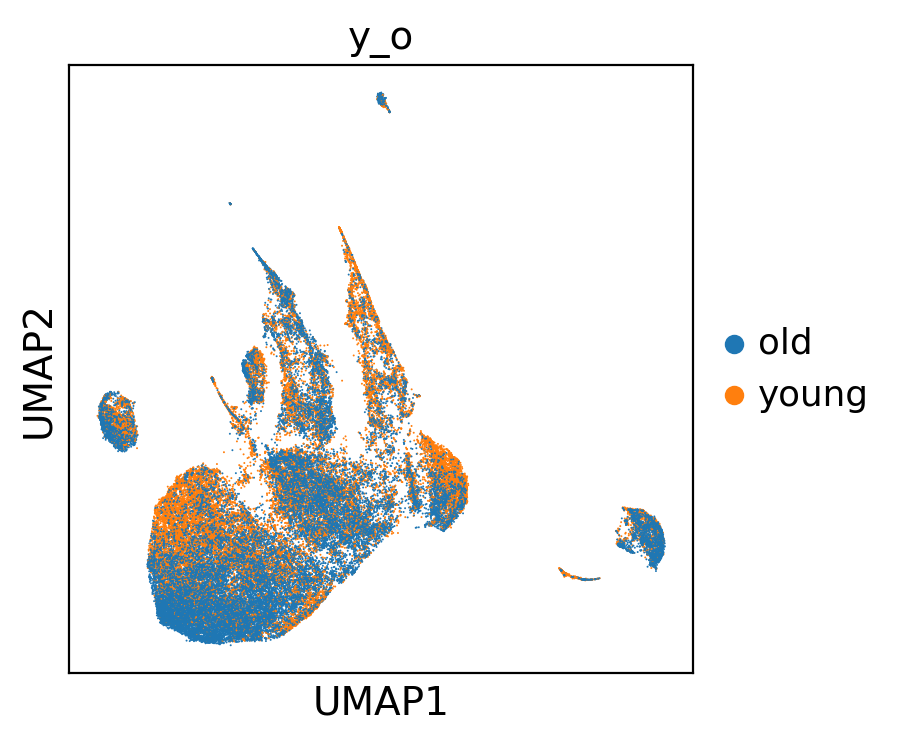

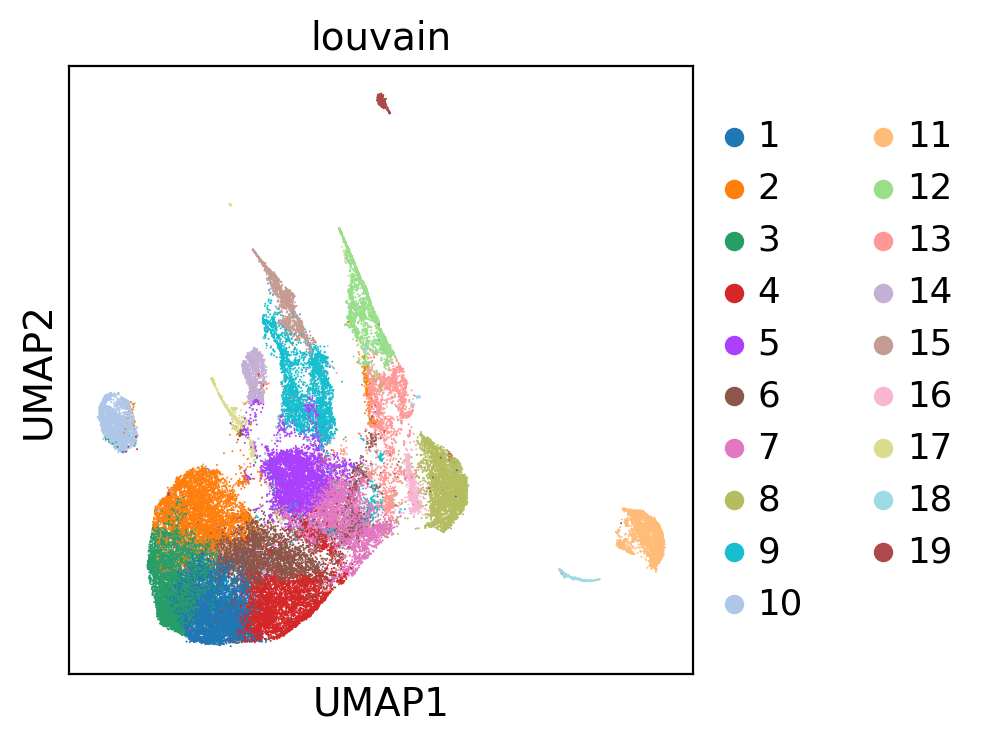

In [13]:
utils.basic_plot(adata_analysis)

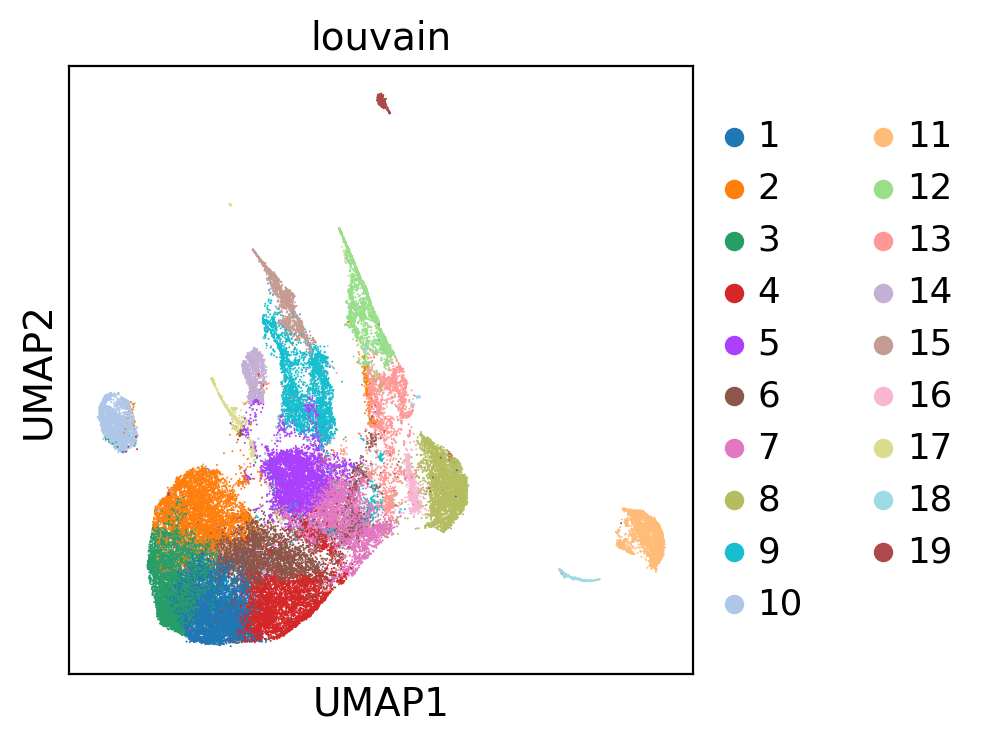

In [14]:
utils.data_output(adata_analysis, model_name)

In [15]:
adata_analysis.write(results_analysis_file)